In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import netCDF4 as nc4

# https://mpl-point-clicker.readthedocs.io/en/latest/
from mpl_point_clicker import clicker
from mpl_interactions import zoom_factory, panhandler

with open('mbathy.npy', 'rb') as f:
    mbath = np.load(f,allow_pickle=True)
    
with open('mbathy_mask.npy', 'rb') as f:
    mmask = np.load(f,allow_pickle=True)

bath =np.ma.masked_where(mmask==1,mbath)

# twilight, gnuplot, gist_heat, hsv
palette = plt.get_cmap("YlGnBu",75)
kwargs_colorbar = dict(orientation="horizontal",shrink=0.8, 
                       location='bottom',aspect = 60, fraction=0.05,pad = 0.1)

---
---
## eORCA

In [ ]:
""" Read bathy from eORCA
"""
pmm = "../../eORCA1.4.2_ModifStraits_mesh_mask.nc"
#pmm = "../eORCA1.4.2_ModifStraits_domain_cfg.nc"
%matplotlib inline

mm = nc4.Dataset(pmm)

e3t = mm.variables['e3t_0'][0] 
totl = mm.variables['tmaskutil'][0]  # 
botl = mm.variables['mbathy'][0] # goes from 0 to 74 (75 levels)
nJ,nI = np.shape(botl)
#nJ,nI = np.shape(botl) # j=0 Antartique, nJ-1 Arctique

""" Build bathy from eORCA
"""
depw = np.zeros((nJ,nI)) ; dept = np.zeros((nJ,nI))
# z : PYTHON+1=NEMO
for j in range(nJ):
    for i in range(nI):
        k0 = botl[j,i]
        # botl[j,i] est la dernière cellule mouillé NEMO
        # botl[j,i]-1 dans python
        # botl[j,i]-1+1 pour le slicing
        depw[j,i] = np.sum(e3t[:k0,j,i])
        
mbathy = np.ma.masked_where(totl==0,depw)

""" plot
"""
fig, ax = plt.subplots(figsize=(6,6))
plt.imshow(mbathy) 
ax.invert_yaxis()
plt.colorbar()
plt.show()

with open('mbathy.npy', 'wb') as f:
    np.save(f, mbathy.data,allow_pickle=True)
with open('mbathy_mask.npy', 'wb') as f:
    np.save(f, mbathy.mask,allow_pickle=True)
print("saved")

---
---
## Shapiro

saved


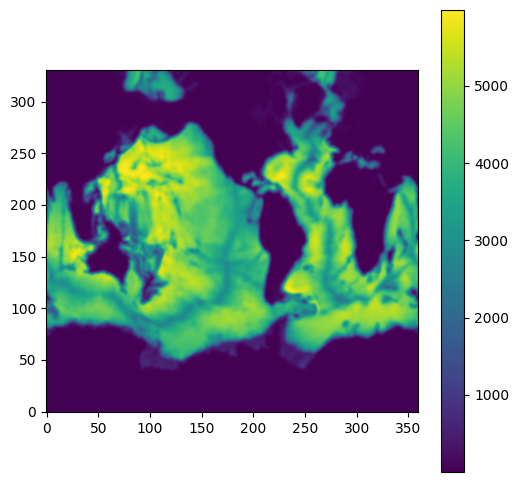

In [4]:
def shapiro2d(data,n=1):
    tmp = np.copy(data) ; z2d = np.copy(data) ; nlat,nlon = np.shape(data)
    for _ in range(n):
        for lat in range(1,nlat-1):
            z2d[lat,:] = 0.25 * tmp[lat-1,:] + 0.5 * tmp[lat,:] + 0.25 * tmp[lat+1,:]
        tmp = np.copy(z2d)
        for lon in range(1,nlon-1):
            z2d[:,lon] = 0.25 * tmp[:,lon-1] + 0.5 * tmp[:,lon] + 0.25 * tmp[:,lon+1]
        tmp = np.copy(z2d)
    return(z2d)

mbathy_shapiro = shapiro2d(mbath,n=3)
with open('mbathy_shapiro3.npy', 'wb') as f:
    np.save(f, mbathy_shapiro,allow_pickle=True)
print("saved")

%matplotlib inline
fig, ax = plt.subplots(figsize=(6,6))
plt.imshow(mbathy_shapiro)
ax.invert_yaxis()
plt.colorbar()
plt.show()